1. 유투브 검색할 단어를 입력받게 하세요.
2. 화면을 전체화면으로 만드세요
3. 유투브 사이트 집속
4. 검색할 단어를 상단의 검색창에 입력하고 엔터를 누르세요.

5. 필터에 동영상 클릭
6. 페이지다운 키를 20번 누르게 설정
7. 유투브 제목 저장

8. 영상클릭 할 수 있는 썸네일을 리스트에 저장
9. 반복을 통하여 맨위에 썸네일부터 클릭
10. 스크롤을 10번 반복하여 내림
11. 댓글을 저장
>[제목, 댓글1 댓글2 댓글3]

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time
from bs4 import BeautifulSoup
import csv

In [38]:
keyword = input('검색어를 입력하세요 :')



#방법1
#옵션
options = Options()
options.add_argument('--start-fullscreen')

#풀스크링 방법 2
#driver.maximize_window()

#드라이버를 로드할 때 옵션 같이 넣어준다.
driver = webdriver.Chrome('chromedriver.exe', chrome_options=options)
#열릴 떄 까지 1초 대기시킨다
driver.implicitly_wait(1)
#접속
driver.get('https://www.youtube.com/')
#3초대기
time.sleep(3)



e = driver.find_element_by_id('search')
e.click()
e.send_keys(keyword)
e.send_keys(Keys.ENTER)
time.sleep(2)


e = driver.find_element_by_link_text('필터')
e.click()
time.sleep(1)

e = driver.find_element_by_link_text('동영상')
e.click()
time.sleep(1)

body = driver.find_element_by_tag_name('body')

for i in range(0,3):
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    
html = driver.page_source
soup = BeautifulSoup(html,'lxml')
titledata = soup.find_all('a',{'id' : 'video-title'})

title_result_list = []
for temp in titledata:
    title_result_list.append(temp.attrs['title'])

    
    
thumbnail = driver.find_elements_by_tag_name('ytd-video-renderer')


result = []


f = open('{0} - 유튜브댓글.csv'.format(keyword) , 'w', encoding='utf-8')
f.write('제목'+',' + '내용' + '\n')


for temp in thumbnail:
    
    try:
        tresult_list = []

        temp.click()
        time.sleep(2)


        tbody = driver.find_element_by_tag_name('body')

        #원래는 끝까지 해야함
        for temp1 in range(0, 1):
            tbody.send_keys(Keys.PAGE_DOWN)
            time.sleep(1)

        html = driver.page_source
        soup = BeautifulSoup(html,'lxml')
        rdata = soup.find_all('yt-formatted-string',{'id':'content-text'})


        #ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ댓글

        tdata = soup.find('h1',{'class':'title style-scope ytd-video-primary-info-renderer'})
        ttitle = tdata.text



        replytext = ''
        for temp in rdata:
            replytext = replytext + temp.text + ' '

        tresult_list.append(ttitle)
        tresult_list.append(replytext)


        result.append(tresult_list)
        f.write(ttitle + ',' + replytext +'\n')
        
        
    
    except:
        print('오류')
    
    

    driver.back()
f.close()

#driver.back()

검색어를 입력하세요 :커피


<ipython-input-38-8e2ee33523ab>:14: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver.exe', chrome_options=options)


In [39]:
result

[['집에서 맛있는 커피 편하게 뽑고 싶으세요? 이거 사시면 됩니다',
  '시식할 때마다 안경에 김 서리는 거 너무 웃겨요 ㅋㅋㅋㅋㅋ 에어로보단 쉽게 추출한다는것만으로 쓸만하겠네요 템퍼와 디스트리뷰터의 신박한 사용법♬!ㅋㅋㅋ 와.. 제가 궁금하던 제품입니다. 감사해요!! 개똥되삣네 ㅋㅋㅋㅋ 빵터졌어요 ㅋㅋ\n편해보여서 좋으네요 누르는 손잡이 윗쪽에 물통같은 걸 달아서 물로 무게를 주어서 누르도록 만드는 것두 괜찮을꺼 같네요.. 위에 물건을 올리면 흔들릴 수도 있고 적당한 물건을 찾기 어려울 수도 있으니까요. 재밋어ㅠㅠㅠ 약간 조잡하긴한데 뭐 \n소소 하네요\n좋은 정보 감사합니다^^ 농도자체가 다르네요! 일정무게로 압력을 주는거 좋은 방법이네요. 코케허니나 한잔 내려먹어야지 남자커피님이 알려주신 우유냉침라테로 잘먹고있는데요~ㅎ혹시 오늘 하신 방법이랑 우유냉침중 어떤걸 추천하시겠어요?궁금해요^^ 9:26 우야노 ㅋㅋㅋㅋㅋㅋㅋㅋ 개똥되삣넼ㅋㅋㅋㅋㅋㅋㅋ 우와~~ 아이디어들이  좋아요\n신기한제품이네요\n😊역시❤커피는☕남자커피👍 원두 굵기는 모카포트 굵기가 홈카페 하기에 가장 만능 같더라구요.\n\n일단 모카포트, 에어로 프레스, 델타 프레스, 핀 드리퍼, 콜드 브루\n이거 다 모카포트 굵기라서 그라인더 맞춰서 계속 이렇게 뽑아먹으니깐 좋네요. ㅋㅋㅋㅋ\n\n델타 프레스는 못 써봤지만, 나머지는 굵기와 양도 같은데 맛이 다른데 기구별로 맛이 다른게 참 신기해요. 이거 ㄹㅇ 좋음 컴프레소 영상도 보고 왔는데 컴프레소랑 이 제품중에 어떤게 더 나을까요? ㅋㅋㅋ.. 쪼깸 올리가 누르고~ 쪼깸 올리가 누르고~ \n정말 오랜만에 듣는 리얼 경상도 사투리 영상이네요 \n내용도 내용이지만 듣는 재미에 얼마나 웃었는지~^^ 안녕하세요! 커피 입문초보자입니다. 커피 저울 및 커피포토 추천 부탁드립니다.커피온도는 어떻게 측정하나요? 스타벅스 컴프레소가 훨씬 좋아보이네요 이거 혹시 레버형 수동머신이랑 같은원리인가요? 묵을 만하다 ㅋㅋㅋ '],
 ['BTS (방탄소년단) - COFFEE

In [40]:
#이거로 형태소 분석이랑 워드클라우드 해보기

In [52]:
import os
import sys
import urllib.request
import json
import re
import konlpy
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def get_tags(text, ntags=50): #태그를 나눈다. 태그란? 각 글자를 의미
    #기본값을 50으로 설정해준다. ntags는 단어수를 의미한다.
    spliter = Okt() #Open Korean Text -> 한국어 분석기
    nouns = spliter.nouns(text) # 명사로 나눈다
    count = Counter(nouns) #명사의 갯수를 센다.
    return dict(count.most_common(ntags)) # 딕셔너리형태로 갯수를 반환해준다.


def clean_str(s): #특수기호와 영어를 제거해준다.
    hangul = re.compile('[^ㄱ-ㅎ|가-힣]+')
    s = hangul.sub(r' ',s)# 띄어쓰기를 넣어줘야 띄어쓰기가 되서 나온다.
    
    cp = re.compile("["
                     u"\U00010000-\U0010FFFF"
                     "]+", flags=re.UNICODE) #이건 영어 제거였나 그럼
    s = cp.sub(r' ',s)
    return s.strip() #쓸데없는거 지우고 리턴해준다.


#####워드클라우드

def Wordcloud(data , savename , maskname=''):
    #워드클라우드는 폰트가 중요하다. 왜냐하면 보여지는게 중요하기때문
    if maskname == '': 
        wc = WordCloud( font_path='font/BMEULJIROTTF.ttf' , background_color='white', max_font_size=60, colormap='copper')
    else:
        maskimg = np.array(Image.open(maskname)) #마스크(사진)이 있으면 불러오고 그에 맞게 만들어준다.
        wc = WordCloud(font_path='font/BMEULJIROTTF.ttf' , background_color='white', mask=maskimg, max_font_size=60, colormap='copper')
        
    #여기서부터는 시각화 부분이라 몰라도되고 그냥 가져다 쓰자
    wc.generate_from_frequencies(data)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    wc.to_file(savename + ".png")

In [53]:
textdata = ''

#크롤링해서 나온 데이터를 하나로 합쳐주는 역할,,, 이어쓰기? 라고 보면될듯
for temp in result:
    textdata = textdata + ' ' + temp[1] 
    #2번이 description 그니까 설명 부분이다. 강사님은 설명부분 가져다씀

    
tresult = get_tags(textdata)
print(tresult)

{'커피': 132, '영상': 40, '정말': 26, '것': 25, '원두': 23, '저': 22, '때': 21, '이': 21, '거': 20, '물': 18, '바리스타': 18, '맛': 17, '더': 16, '수': 16, '오늘': 15, '노래': 15, '드립': 15, '추출': 14, '생각': 14, '진짜': 14, '사람': 14, '제': 13, '정보': 13, '시간': 11, '알': 11, '설명': 11, '정도': 11, '우유': 10, '엄마': 10, '말': 10, '가장': 9, '보고': 9, '구독': 9, '항상': 9, '나': 9, '최고': 9, '거품': 9, '내용': 8, '온도': 8, '전': 8, '제일': 8, '아메리카노': 8, '사용': 8, '잔': 8, '하루': 8, '선생님': 8, '문제': 8, '걸': 7, '요': 7, '방법': 7}


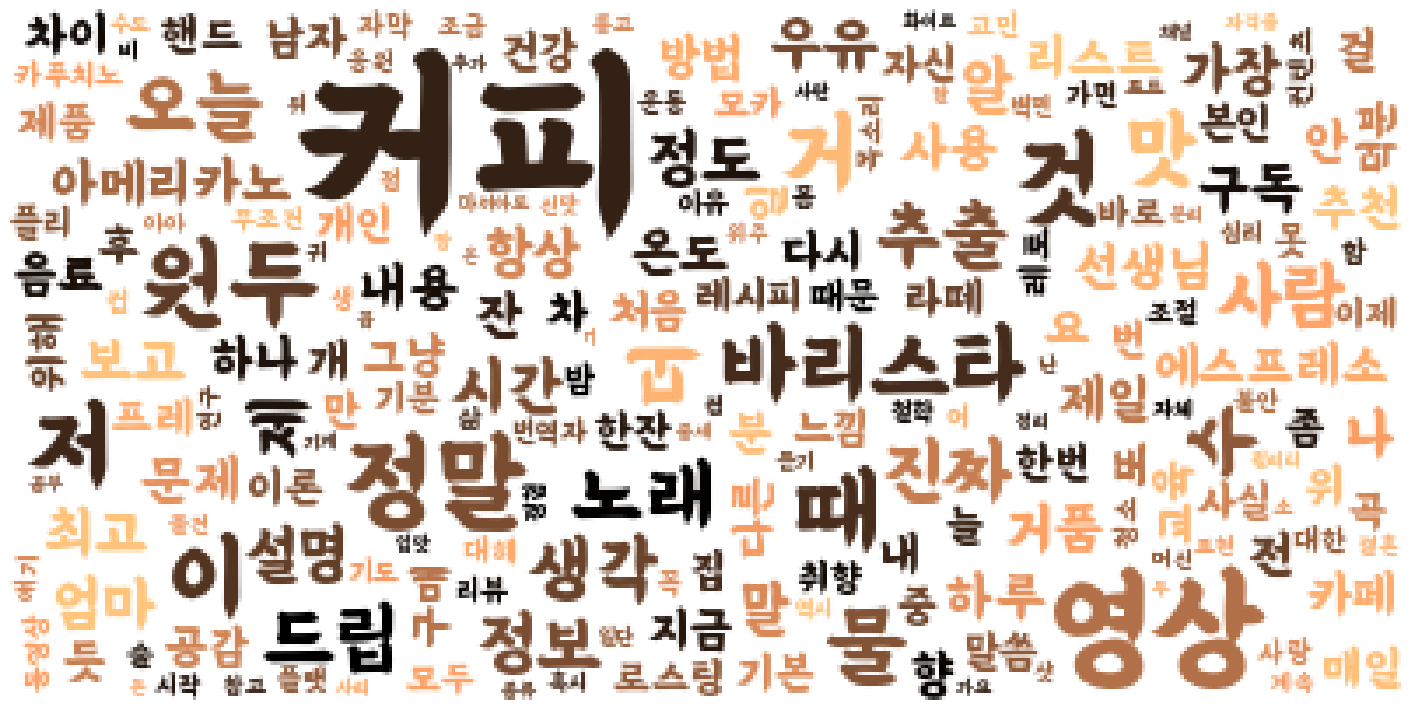

In [54]:
tresult = get_tags(textdata,ntags=200)
Wordcloud(tresult,'유투브')
#위에서 정의해준 함수를 보면 된다.... 커피블로그는 사진이 만들어지는 이름